## Week Six - Data Sets

Here is a dataset that shows a simple 2-node network:  the attendance of 18 Southern Women at 14 social events:


1.   [Brief Description](http://vlado.fmf.uni-lj.si/pub/networks/data/ucinet/ucidata.htm#davis). Small “musty” datasets like that from this 1941 study have proven very valuable in testing and comparing new network algorithms.
2.   Dataset.
3.   Python code to create dataset: https://networkx.github.io/documentation/stable/auto_examples/algorithms/plot_davis_club.html

What can you infer about the relationships between (1) the women, and (2) the social events? 

## Load Data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import networkx.algorithms.bipartite as bipartite

%matplotlib inline
plt.rcParams["figure.figsize"] = (12,10)

G = nx.davis_southern_women_graph()
women = G.graph['top']
clubs = G.graph['bottom']


## Biadjacency matrix

In [2]:
print(bipartite.biadjacency_matrix(G, women, clubs))

  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 7)	1
  (0, 8)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 4)	1
  (1, 5)	1
  (1, 6)	1
  (1, 7)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	1
  (2, 4)	1
  (2, 5)	1
  (2, 6)	1
  (2, 7)	1
  (2, 8)	1
  (3, 0)	1
  (3, 2)	1
  :	:
  (12, 7)	1
  (12, 8)	1
  (12, 9)	1
  (12, 11)	1
  (12, 12)	1
  (12, 13)	1
  (13, 5)	1
  (13, 6)	1
  (13, 8)	1
  (13, 9)	1
  (13, 10)	1
  (13, 11)	1
  (13, 12)	1
  (13, 13)	1
  (14, 6)	1
  (14, 7)	1
  (14, 9)	1
  (14, 10)	1
  (14, 11)	1
  (15, 7)	1
  (15, 8)	1
  (16, 8)	1
  (16, 10)	1
  (17, 8)	1
  (17, 10)	1


## Women

### Degrees

In [3]:

# project bipartite graph onto women nodes
W = bipartite.projected_graph(G, women)
print('')
print("# of Friends, Member")

W_degrees = {}
for w in women:
    W_degrees[w] = W.degree(w)

for w in sorted(W_degrees, key=W_degrees.get, reverse=True):
  print(W_degrees[w], w)




# of Friends, Member
17 Evelyn Jefferson
17 Theresa Anderson
17 Ruth DeSand
17 Verne Sanderson
17 Sylvia Avondale
17 Nora Fayette
17 Helen Lloyd
16 Pearl Oglethorpe
16 Myra Liddel
16 Katherina Rogers
16 Dorothy Murchison
15 Laura Mandeville
15 Brenda Rogers
15 Frances Anderson
15 Eleanor Nye
12 Olivia Carleton
12 Flora Price
11 Charlotte McDowd


### Weights

In [4]:
# project bipartite graph onto women nodes keeping number of co-occurence
# the degree computed is weighted and counts the total number of shared contacts
W = bipartite.weighted_projected_graph(G, women)
print('')
print("#Friend meetings, Member")
    
W_weights = {}
for w in women:
    W_weights[w] = W.degree(w, weight='weight')

for w in sorted(W_weights, key=W_weights.get, reverse=True):
    print(W_weights[w], w)


#Friend meetings, Member
57 Theresa Anderson
50 Evelyn Jefferson
46 Brenda Rogers
46 Sylvia Avondale
45 Laura Mandeville
43 Nora Fayette
40 Ruth DeSand
38 Verne Sanderson
37 Katherina Rogers
36 Eleanor Nye
34 Helen Lloyd
33 Myra Liddel
32 Frances Anderson
31 Pearl Oglethorpe
24 Charlotte McDowd
24 Dorothy Murchison
14 Olivia Carleton
14 Flora Price


From the degrees almost all the women are equally connected with only Olivia Carleton, Flora Price, Charlotte McDowd having considerably less connections.

From the weighted connections, Theresa Anderson and Evelyn Jefferson have considerably more influence than the rest. Olivia Carleton and Flora Price are considerably less influential, but Charlotte McDowd has more influence despite having lower number of connections.

### Network Graphs

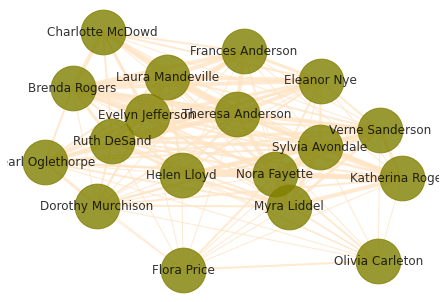

In [5]:
weights=[edata['weight'] for f,t,edata in W.edges(data=True)]

nx.draw(W, with_labels=True, node_size=2000, node_color="olive", font_size=12, font_family="sans-serif", 
                width=weights, edge_color="bisque", alpha=0.8)

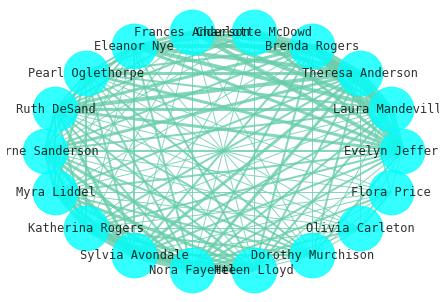

In [6]:
nx.draw_circular(W,width=weights, edge_color="mediumaquamarine", node_color="aqua", with_labels=True, node_size=2000, font_size=12, font_family="Monospace", 
                alpha=0.8)

The Circular layout has two zones of influence: One centered near Evelyn, Laura, Theresa and Brenda and the other centered around Katherina, Sylvia and Nora. 

The Spring layout graph shows the most influential people

## Clubs

### Degrees

In [7]:
# project bipartite graph onto club nodes
C = bipartite.projected_graph(G, clubs)
print('')
print("#Clubs")
    
C_degrees = {}
for c in clubs:
    C_degrees[c] = C.degree(c)

for c in sorted(C_degrees, key=C_degrees.get, reverse=True):
  print(C_degrees[c], c)


#Clubs
13 E6
13 E7
13 E8
13 E9
8 E1
8 E2
8 E3
8 E4
8 E5
8 E10
8 E11
8 E12
8 E13
8 E14


Clubs E6, E7, E8, and E9 are more influential than the rest based on degrees.

### Weights

In [8]:
# project bipartite graph onto women nodes keeping number of co-occurence
# the degree computed is weighted and counts the total number of shared contacts
C1 = bipartite.weighted_projected_graph(G, clubs)
print('')
print("#Club attendance, Clubs")

C_weights = {}
for c in clubs:
    C_weights[c] = C1.degree(c, weight='weight')

for c in sorted(C_weights, key=C_weights.get, reverse=True):
  print(C_weights[c], c)


#Club attendance, Clubs
59 E8
48 E7
46 E9
41 E6
38 E5
32 E3
28 E12
25 E10
23 E4
20 E2
19 E1
18 E13
18 E14
13 E11


Still clubs E6, E7, E8, and E9 are more influential in terms of weight, but club E8 stands above all of them.

### Network Graphs

findfont: Font family ['Cursive'] not found. Falling back to DejaVu Sans.


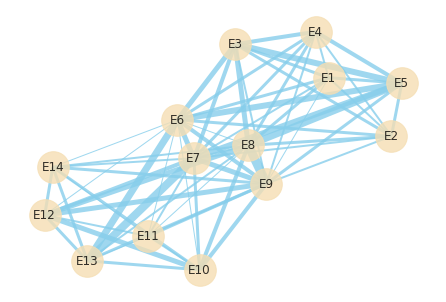

In [9]:
weights=[edata['weight'] for f,t,edata in C1.edges(data=True)]

nx.draw(C,with_labels=True, node_size=1000, node_color="wheat", font_size=12, font_family="Cursive", 
                width=weights, edge_color="skyblue", alpha=0.8)

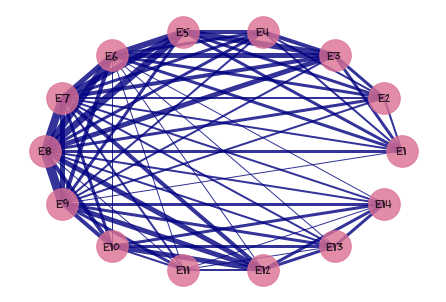

In [10]:
nx.draw_circular(C1, width=weights, edge_color="navy", node_color="palevioletred", with_labels=True, node_size=1000, font_size=12, font_family="fantasy", 
                alpha=0.8)

From the Spring layout graph the four most influential clubs are E6, E7, E8, and E9.

From the Circular it is easy to spot missing connections; for instance between E1 and E10 through E14 and between E14 and E1 through E5.

## Bi-Modal Graphs

### Spring Layout

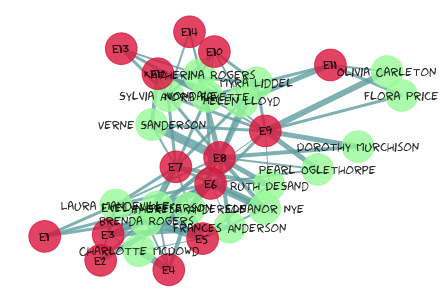

In [11]:
colors = []
for node, data in G.nodes(data=True):
    if data['bipartite'] == 1:
        colors.append('crimson')         
    else:
        colors.append('palegreen')

nx.draw(G, with_labels=True, node_size=1000, node_color=colors, font_size=12, font_family="Fantasy", 
                 width=weights, edge_color="cadetblue", alpha=0.8)

### Circular Layout

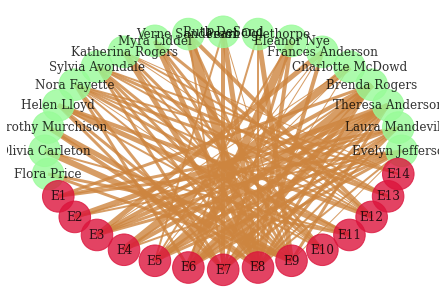

In [12]:
nx.draw_circular(G, with_labels=True, node_size=1000, node_color=colors, font_size=12, font_family="serif", 
                 width=weights, edge_color="peru", alpha=0.8)

## Conclusion


*   Theresa Anderson is by far the most active and influential participant in club life
*   Sylvia Avondale, Evelyn Jefferson, Nora Fayette, Brenda Rodgers and Laura Mandeville are also very influential but not in all the same clubs.
*   Clubs E6, E7, E8, and E9 are the most popular and Clubs E1, E13, and E14 are the least popular clubs.
*   Theresa Anderson attends all four of the most influential clubs: E6, E7, E8 and E9
*   Evelyn Jefferson attends E6, E8 and E9 clubs, but not E7
*   Brenda Rodgers attends E6, E7 and E8 clubs, but not E9
*   Sylvia Avondale attends E7, E8, and E9 clubs, but not E6

